<h1 style="text-align:center;font-family:'Montserrat';color:magenta">TP2 : TRAITEMENT DU SON</h1>

On importe dans le code ci-dessous les libraries Pydub et matplotlib et numpy et tkinter pour les utuliser dans notre code ainsi les modules de python os et time .

on utilise askopenfilename() comme un outil pour ouvrir les fichiers stocker le chemin dans un variable qu'on a appelé file puis on utulise AudioSegment.from_file()pour ouvrir notre fichier comme un segment

In [5]:
from pydub import AudioSegment,silence
from pydub.playback import play
import os ,time
import numpy as np
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename as op
from pydub.filters import *

directory = os.getcwd()
file = op(title="Sélectionnez le fichier désirée")

sound  = AudioSegment.from_file(file)



In [19]:
 os.path.splitext(file)[1].lower()

'.mp3'

#### Question 2

Dans cette question on utulise sound.channels pour savoir le nombre de voie dans notre audio.Le but est de savoir de quelle de type d'audio s'agit-il mono/stéréo/etc.....

In [20]:
def pistes(sound):
    if sound.channels==1:
        print('l\'audio s\'agit d\'un mono ')
    elif sound.channels==2:
        print('l\'audio s\'agit d\'un stéréo ')
    elif sound.channels==4:
        print('l\'audio s\'agit d\'un quadripule ')
    elif sound.channels==7:
        print('l\'audio s\'agit d\'un dolby ')
pistes(sound)

l'audio s'agit d'un stéréo 


##### Question 3

Le code ci-dessous : <code>sound.split_to_mono()</code> donne un tuple dans lequelle l'indice 0 indique canal gauche et l'indice 1 indique canal droite

In [21]:
liste = sound.split_to_mono()
left_channel = liste[0]
right_channel= liste[1]



la liste de compréhension ci-dessous fait le méme fonctionnalité que le code ci-dessus 
et on fait appel a<code> plt.subplots() </code> pour avoir deux graphe dans le méme block 1er est le graphe de canal gauche et le 2éme est le graphe du canal droit .<br>
Puis On trouve le deuxiéme graphe qui est le graphe du son entier

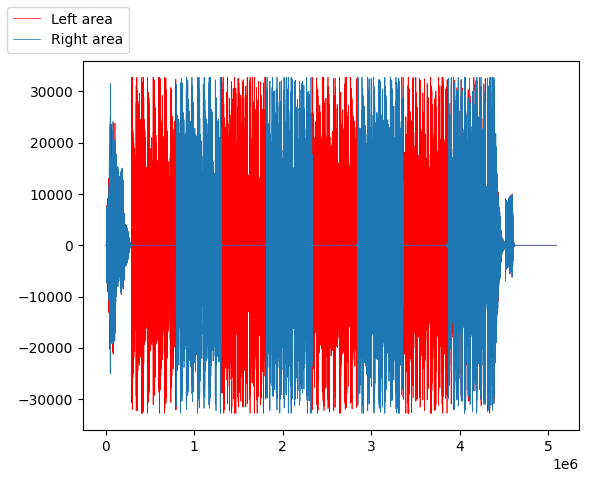

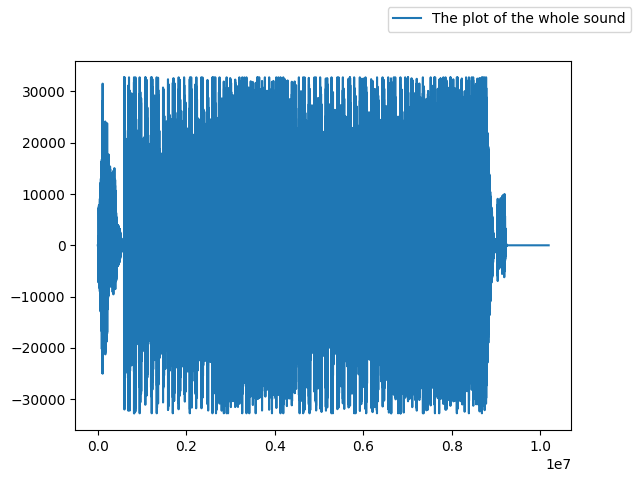

In [22]:
valeur = np.frombuffer(sound.raw_data,dtype=np.int16)
left =[val for i,val in enumerate(valeur) if i%2==0]

right = [val for i,val in enumerate(valeur) if i%2!=0]
sound_left_right = [val for i , val in enumerate(valeur)] 
fig,ax=plt.subplots()
line1, =ax.plot(left,label="Left area",linewidth=0.5,color='red')
line2, = ax.plot(right,label='Right area',linewidth=0.55)
FIG,ax2 = plt.subplots()
line = ax2.plot(sound_left_right, label="The plot of the whole sound",)
fig.legend(loc='outside upper left')

FIG.legend(loc='outside upper right')

plt.show()



Le code ci-dessous fait un extrait d'aprés les indices k1 qui est la valeur de début de l'extrait en milliseconds et K2 est la valeur du fin d'extrait en millisecondes et cette fonction prend audio_name comme paramétre c'est le nom de fichier et extension c'est l'extension du fichier audio

In [23]:


def extrait (audio_name,extension,K1,K2):
    # Choisir fichier ;
    sound  = AudioSegment.from_file(f'{directory}/Audio_Files/{audio_name}.{extension}',format=f'{extension}')
    # K2 doit obligatoirement être plus grand que K1 et les valeurs doit étre en millisecondes;
    output = sound[K1:K2]
    return output

La fonction graphe donne une représentation graphique sur l'extrait fournie en fonction du temps 
<code>valeur = np.frombuffer(extrait(audio_name,extension,K1,K2).raw_data,dtype=np.int16)</code> prend le code hexadecimal et le convertit en des valeurs numériques 
<code>left = valeur[0::2]</code>et<code>right= valeur[1::2]</code> prend les échantillons du left and right respectivement
<code>temps = [i * période_échantillon for i in range(0,int(N))]</code> donne l'axe du temps d'aprés la relation donnée dans le TP qui est [0 Te Te*2 ....... N*Te] avec N est le nombre d'échantillons 
<code>N = len(extrait(audio_name,extension,K1,K2).get_array_of_samples())/2</code> donne le nombre d'échantillons du son entier et on le divise par 2 pour avoir le nombre d'échantillons pour le canal gauche seul et pour le canal droite seul

In [24]:



def graphe(audio_name,extension,K1,K2):
    valeur = np.frombuffer(extrait(audio_name,extension,K1,K2).raw_data,dtype=np.int16)
    #left =[val for i,val in enumerate(valeur ) if i%2==0]
    #right = [val for i,val in enumerate(valeur)if i%2!=0]
    #sound_left_right = [val for i , val in enumerate(valeur)] 
    left = valeur[0::2]
    right= valeur[1::2]
    période_échantillon = 1/extrait(audio_name,extension,K1,K2).frame_rate
    #N=(len(extrait(audio_name,extension,K1,K2))/1000)*extrait(audio_name,extension,K1,K2).frame_rate* extrait(audio_name,extension,K1,K2).channels
    N = len(extrait(audio_name,extension,K1,K2).get_array_of_samples())/2
    temps = [i*période_échantillon for i in range(0,int(N))]

    fig, ax = plt.subplots(ncols=2, figsize=(12, 12))
    ax[0].plot(temps,right,label='right',color='red')
    ax[1].plot(temps,left,label='left',color='green')
    ax[0].legend()
    ax[1].legend()
    plt.show()


<code>sound.frame</code>c'est le nombre de bit pour chaque échantillon

In [26]:
sound.frame_width

4

Résultat du fonction graphe :

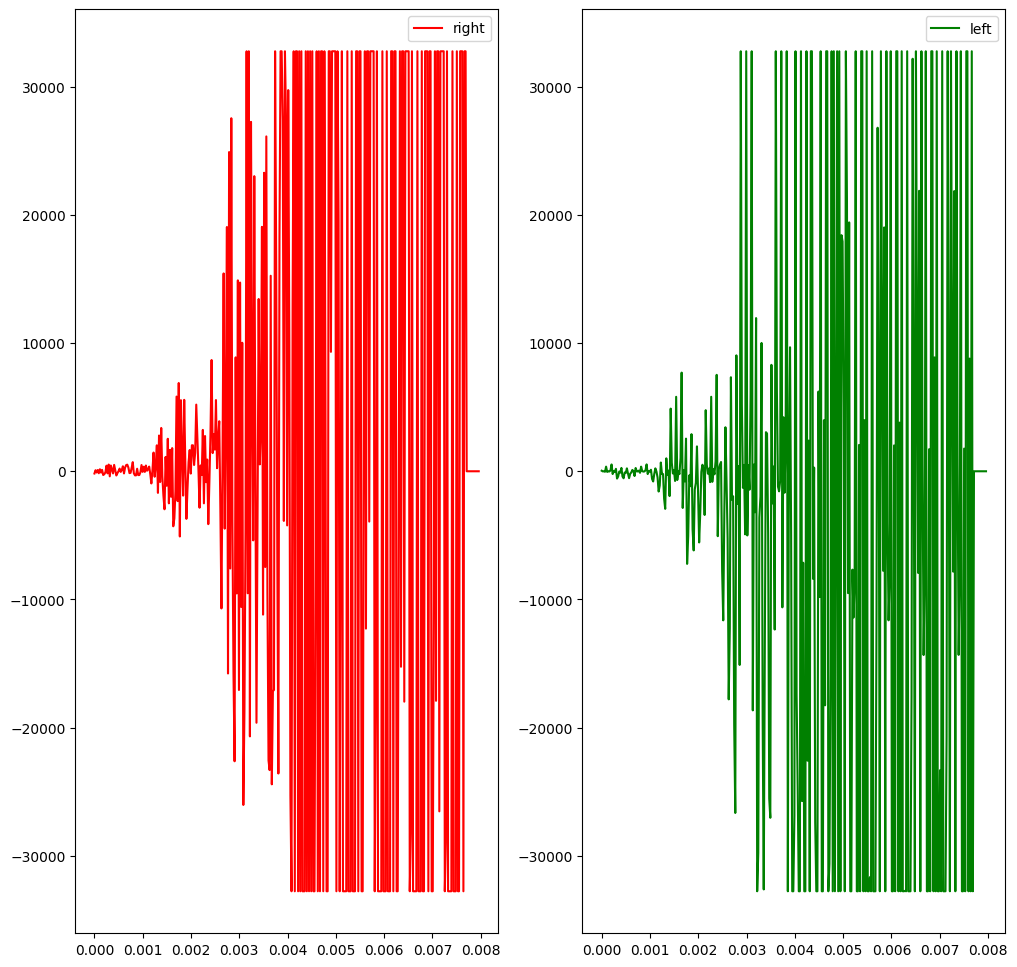

In [27]:
graphe('Despertar','wav',1,1900)

la fonction output_extrait fait exporter l'extrait sous forme un fichier audio en spécifiant le chemin et le nom du fichier et l'extension du fichier exporter

In [ ]:
def output_extrait(audio_name,extension,K1,K2):
    extrait(audio_name,extension,K1,K2).export(f'{directory}/{audio_name}_output.wav',format='wav')

In [28]:
sound3 = AudioSegment.from_file(f'{directory}/Audio_Files/Stereo Sound Test (192 kbps).mp3',format="mp3")


tout les traitements dans cette question sont des combinaisons des questions précédentes la seul différence est la création du fichier nouveau que je vais expliquer maintenant pour créer un fichier audio on doit spécifier l'entéte de ce fichier qui contient des informations des informations sur le fichier <code>AudioSegment(sample_width=audio.sample_width,frame_rate= audio.frame_rate,channels=2,data=right[1])</code> sample_width est le codage sur lequel ce fichier sera codé frame_rate est la fréquence de ce fichier et data est le champ des données en hexadecimal et channels qui spécifie le nombre de voix.

In [ ]:



def tuple_left_right(audio):
    valeur = np.frombuffer(audio.raw_data,dtype=np.int16)
    left =[val for i,val in enumerate(valeur) if  i%2==0]
    right = [val for i,val in enumerate(valeur) if  i%2!=0]
    return (left,right)
def list_stereo_to_mono(audio):
    left_channel = np.zeros(len(np.frombuffer(audio.raw_data,dtype="int16")),dtype=f"int{audio.sample_width * 8 }")
    right_channel = np.zeros(len(np.frombuffer(audio.raw_data,dtype="int16")),dtype=f"int{audio.sample_width * 8 }")
    tuple_list  = tuple_left_right(audio)
    left_channel[::2] = tuple_list[0]
    right_channel[1::2]= tuple_list[1]
    left_channel.tobytes()
    right_channel.tobytes()
    return (left_channel,right_channel)
def left_audio(audio):
    left = list_stereo_to_mono(audio)
    
    audio_output_left = AudioSegment(sample_width=audio.sample_width,
                                 frame_rate=audio.frame_rate,
                                 channels=2,data=left[0])
    audio_output_left.export("audio_output_left_channel.wav",format="wav")
    sound_output=AudioSegment.from_file(f'audio_output_left_channel.wav',format="wav")
    return sound_output
def right_audio(audio):

    right = list_stereo_to_mono(audio)

    audio_output_right = AudioSegment(sample_width=audio.sample_width,frame_rate= audio.frame_rate,channels=2,data=right[1])
    audio_output_right.export('audio_output_right.wav',format='wav')
    sound_output_right=AudioSegment.from_file(f'audio_output_right.wav',format="wav")
    return sound_output_right

In [ ]:
# Exercice 9:
SOUND_STEREO = AudioSegment.from_file(f'{directory}/Audio_Files/Stereo Sound Test (192 kbps).mp3')

In [ ]:
len(SOUND_STEREO)

In [ ]:
snippet_left = extrait("Stereo Sound Test (192 kbps)",'mp3',0,(len(SOUND_STEREO)/3))
snippet_right = extrait("Stereo Sound Test (192 kbps)",'mp3',35391,(35391*2))
stereo = extrait("Stereo Sound Test (192 kbps)",'mp3',(35391*2),(35391*3))
leftAudio= left_audio(snippet_left)
rightAudio= right_audio(snippet_right)
exercice9 = leftAudio + rightAudio+stereo 
exercice9.export(f'{directory}/SoundOutputStere.mp3',format='mp3')


## Partie 2

La fonction ci-dessous donne des informations sur le fichier audio qu'on va traiter 

In [30]:
def Audio_Info(sound):
    son = AudioSegment.from_file(f'{directory}/Audio_Files/{sound}')
    dictionnaire = {}
    dictionnaire['fréquency'] = str(son.frame_rate) + 'Hz'
    dictionnaire['codage'] = str(son.sample_width*8) + ' bit'
    dictionnaire['filesize'] =str( os.path.getsize(f'{directory}/Audio_Files/{sound}')  )  + ' Bytes' 
    dictionnaire['Voix']= str(son.channels) + ' voix'
    dictionnaire['duréé'] = str((len(son)/1000)/60) + ' minutes'
    return dictionnaire

In [31]:
Audio_Info('Stereo Sound Test (192 kbps).mp3')

{'fréquency': '48000Hz',
 'codage': '16 bit',
 'filesize': '2549602 Bytes',
 'Voix': '2 voix',
 'duréé': '1.76955 minutes'}

In [6]:
def augmenter_amplitude_progressivement(fichier_audio, db_max, duree_progression):
    audio = AudioSegment.from_file(fichier_audio)
    audio_modifie = AudioSegment.silent(duration=0)  
    for i in range(0, len(audio), 100):
        extrait = audio[i:i + 100]
        gain_actuel = min(db_max * (i / duree_progression), db_max) 
        extrait_added = extrait.apply_gain(gain_actuel)
        audio_modifie +=extrait_added

    # Écouter l'audio modifié

    return audio_modifie
augmenter_amplitude_progressivement(file,50,20000)

In [ ]:
Audio_db('Stereo Sound Test (192 kbps).mp3')

In [32]:
def graphe_sous_échantillon(audio):
    if audio.channels==1:

        
        valeur = np.frombuffer(audio.raw_data,dtype=f"int{audio.sample_width*8}")
        fig, ax = plt.subplots()
        ax.plot(valeur,label='mono',color='green')
        ax.legend()
        plt.show()
    #left =[val for i,val in enumerate(valeur ) if i%2==0]
    #right = [val for i,val in enumerate(valeur)if i%2!=0]
    #sound_left_right = [val for i , val in enumerate(valeur)] 
    if audio.channels==2:
        valeur = np.frombuffer(audio.raw_data,dtype=f"int{audio.sample_width*8}")

        left = valeur[0::2]
        right= valeur[1::2]
       #N=(len(extrait(audio_name,extension,K1,K2))/1000)*extrait(audio_name,extension,K1,K2).frame_rate* extrait(audio_name,extension,K1,K2).channels

        fig, ax = plt.subplots(ncols=2, figsize=(12, 12))
        ax[0].plot([i for i in range(len(right))],right,label='right',color='red')
        ax[1].plot([i for i in range(len(left))],left,label='left',color='green')
        ax[0].legend()
        ax[1].legend()
        plt.show()

## Sous-échantillonage:

<p>
Le <b>sous-échantillonnage d'un audio</b>, ou downsampling, est un processus qui consiste à réduire la fréquence d'échantillonnage d'un signal audio. La fréquence d'échantillonnage représente le nombre de fois par seconde (en Hertz, Hz) que les échantillons d'un signal continu sont capturés pour le convertir en un signal discret.
</p>
<p>Donc dans notre paramétre number spécifie le facteur de sous-échantillonnage </p>
<p>La différence entre le signal original et le signal sous-échantilloné est une dégradation du son</p>

16
c'est un fichier mono
44100


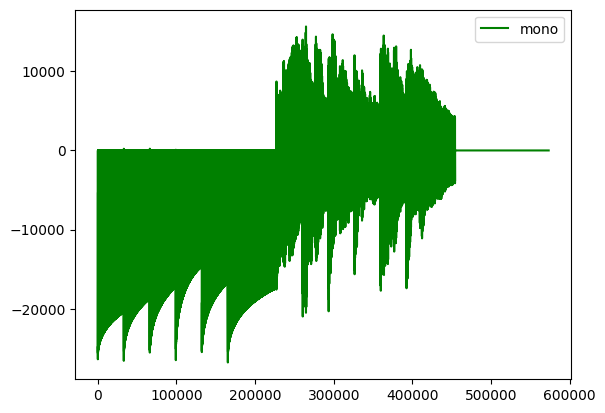

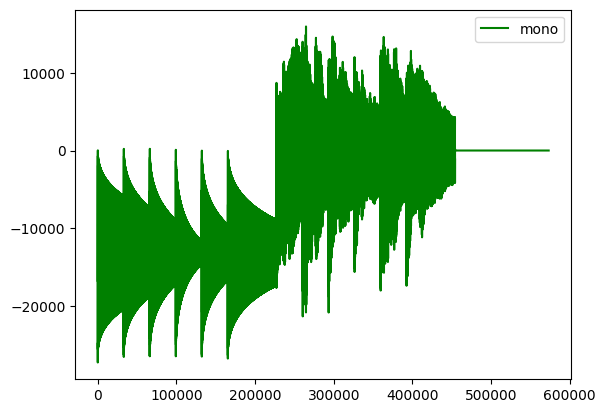

In [26]:


def sous_echantillonage(sound,number):
    son = AudioSegment.from_file(f'{directory}/Audio_Files/{sound}')
    play(son)
    print(son.sample_width*8)
    if son.channels == 1:
        print('c\'est un fichier mono')
        
        data = np.frombuffer(son.raw_data,dtype=f"int{son.sample_width * 8}")
        print(son.frame_rate)
        channel = data[::number]
        zeros = np.zeros(len(data),dtype=f"int{son.sample_width * 8}")
        zeros[0::number]=channel
        zeros.tobytes()
        audio = AudioSegment(data = zeros,frame_rate = son.frame_rate//number, sample_width= son.sample_width,channels= son.channels)
        audio.export(f'{directory}/temp_audio/output_sous_échantillonage.wav')
        graphe_sous_échantillon(audio)
        graphe_sous_échantillon(son)
        time.sleep(len(audio)/1000)
        play(audio)
    
        return audio
    elif son.channels==2:
        print('c\'est un fichier stéréo')
        
        data = np.frombuffer(son.raw_data,dtype=f"int{son.sample_width * 8}")
        print(son.frame_rate)
        left = data[::2]
        right = data[1::2]

        #zeros = np.column_stack((left_channel,right_channel)).flatten()
        zeros = np.zeros( len(data), dtype=f"int{son.sample_width * 8}")
        zeros[0::number]=left[:len(zeros[::number])]
        zeros[1::number]=right[:len(zeros[::number])]
        zeros.tobytes()
        audio = AudioSegment(data =zeros,frame_rate = son.frame_rate//number, sample_width= son.sample_width,channels= son.channels)
        audio.export(f'{directory}/temp_audio/output_sous_échantillonage.wav')
        graphe_sous_échantillon(audio)
        return audio
x=sous_echantillonage('reverb.mp3',2)


fréquence_maximal_restituable() Prend l'audio comme paramétre qui est déja sous-échantilloner et on savant la relation que Fe>2Fmax donc on utulisant cette relation on peut savoir la fréquence maximal restituable 

In [ ]:
def fréquence_maximal_restituable(audio):
    fréquence_nouvelle = audio.frame_rate
    fréquence_maximal_restituable= fréquence_nouvelle/2 
    return fréquence_maximal_restituable
    

### Quantification d'un signal audio

<p>
    On va convertir la maniére sur la quelle notre audio est codé en modifiant les valeurs du chaque échantillon en limitant l'intervalle sur laquelle chacune est codé 
</p>
<table>
  <tr>
    <th>Audio </th>
    <th>Codage Original</th>
    <th>Intervalle </th>
  </tr>
  <tr>
    <td>Son </td>
    <td>8 bit</td>
    <td>[-128,127]</td>
  </tr>
  <tr>
    <td>Son 2</td>
    <td>16 bit</td>
    <td>[−32768, 32767]</td>
  </tr>
  <tr>
    <td>Son 3</td>
    <td>32 bit</td>
    <td>[−2 147 483 648 ,2 147 483 647]</td>
  </tr>
  <tr>
    <td>Son 4 </td>
    <td>64 bit</td>
    <td>[−9 223 372 036 854 775 808 , 9 223 372 036 854 775 807]</td>
  </tr>

</table>

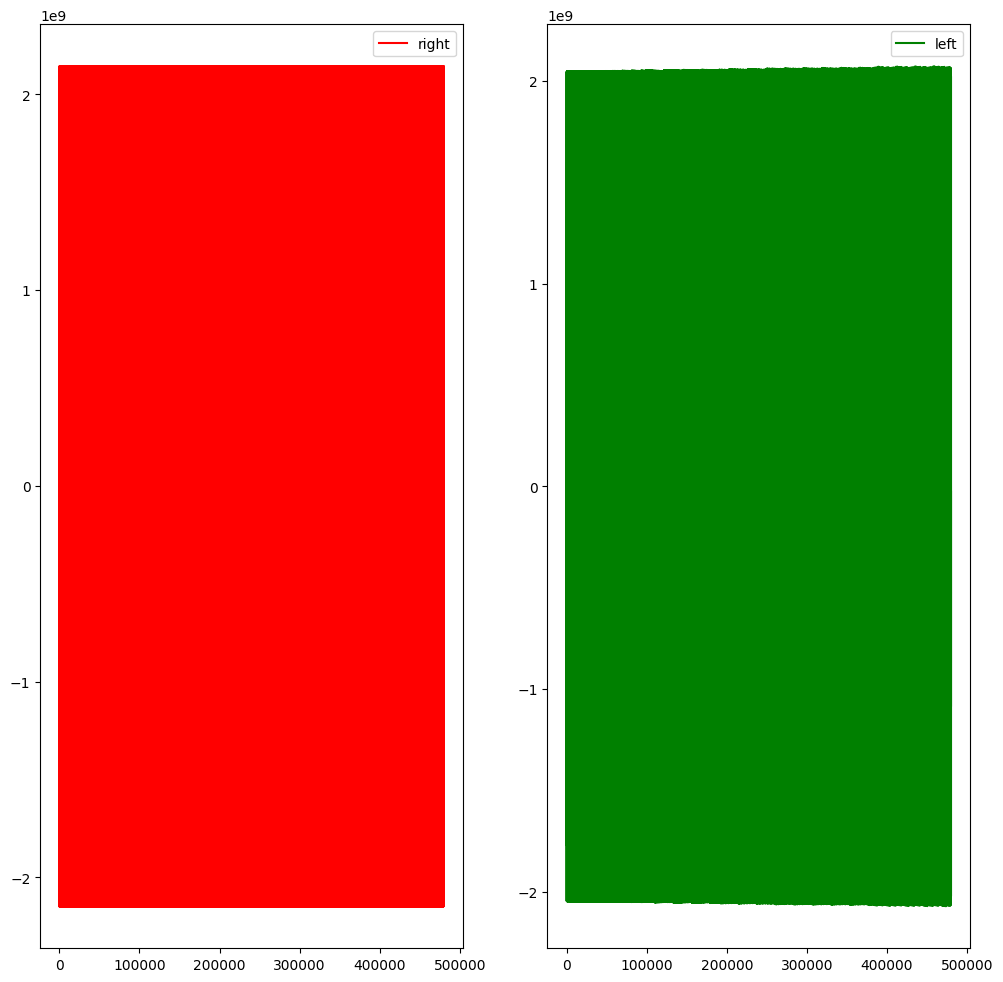

In [20]:
def convertir_les_bits(audio,bit):
    son = AudioSegment.from_file(f'{directory}/Audio_Files/{audio}')
    #time.sleep((len(son)/1000)+2)
    if son.sample_width <bit/8:
        return f'can\'t do this operation because the parameter bit given is bigger than the sample width of the audio wich is:{son.sample_width*8}'
    elif son.sample_width == (bit/8):
        graphe_sous_échantillon(son)
        return son
        
    else:
        Audio_Samples= np.frombuffer(son.raw_data,dtype=f'int{bit}')
        Audio_Samples.tobytes()
        output = AudioSegment(data=Audio_Samples,frame_rate=son.frame_rate,sample_width=int(bit/8),channels=son.channels)
        output.export(f'{directory}/temp_audio/audio_convertit_en_bit.mp3')
        graphe_sous_échantillon(output)
        play(output)
        return output

convertir_les_bits('stereoAudio.wav',32)


2)

Aprés conversion on constate qu'il ya une grande dégradation de l'audio aprés quantification

Aprés conversion on a vu que les valeur on été limités de int 16 :	[−32768, 32767] à int 8 :[-128,127]

In [1]:
def valeur_min_et_max(audio,bit):
    dictionnaire={
        'son original':{},
        'son codable':{}
    }
    son = AudioSegment.from_file(f'{directory}/Audio_Files/{audio}')
    array = np.frombuffer(son.raw_data,dtype=f'int{son.sample_width*8}')
    dictionnaire['son original']['max']=max(array)
    dictionnaire['son original']['min']=min(array)
    x=convertir_les_bits(audio,bit)
    array2 = np.frombuffer(x.raw_data,dtype=f'int{x.sample_width*8}')
    dictionnaire['son codable']['max']=max(list(array2))
    dictionnaire['son codable']['min']=min(list(array2))
    return dictionnaire


In [ ]:
valeur_min_et_max('Stereo Sound Test (192 kbps).mp3',8)

<h1 style="text-align:center;color:cyan"> Bonus</h1>

## Effets Sonores

In [ ]:
audio_plus_fort = audio + 10  
audio_plus_faible = audio - 10  

In [ ]:
audio_echo = audio.overlay(audio - 6, delay=500) 

Un filtre passe-bas laisse passer les fréquences inférieures et atténue les fréquences supérieures. Cela signifie que seules les fréquences basses seront conservées, tandis que les fréquences plus élevées seront réduites ou éliminées.<br>
<code>audio_filtre_bas = low_pass_filter(audio, cutoff=1000) </code>

Un filtre passe-haut laisse passer les fréquences supérieures et atténue les fréquences inférieures. Cela signifie que seules les fréquences plus élevées seront conservées.
<code>audio_filtre_haut = high_pass_filter(audio, cutoff=1000) </code>

In [ ]:
audio_filtre_bas = low_pass_filter(audio, cutoff=1000) 
audio_filtre_haut = high_pass_filter(audio, cutoff=1000) 

In [ ]:
audio.invert_phase()

In [ ]:
silence.detect_silence(audio)

In [ ]:
audio_modifie = normalize(audio_modifie)  


In [ ]:
audio_modifie = audio_modifie.fade_in(2000).fade_out(2000)  


Ce code :
1) <code>Amplitude</code>: l'intensité du vibrato, c'est-à-dire l'ampleur de la variation de la hauteur du son.
2) <code>taux_vibrato </code>: la fréquence du vibrato.
3) <code>audio.get_array_of_samples() </code> renvoie une liste des échantillons de l'audio sous forme de nombres entiers.
4) <code>np.linspace(0, len(samples) / sample_rate, len(samples))</code> crée un tableau allant de 0 à la durée totale du fichier audio (en secondes).
5) <code>np.sin(2 * np.pi * taux_vibrato * t)</code> modifie périodiquement la hauteur de la note.
6) Chaque échantillon audio est multiplié par <code> 1 + modulation</code> ce qui entraîne une variation périodique de la hauteur du son.
7) <code>audio._spawn() </code>génère un nouvel objet AudioSegment à partir des nouveaux échantillons.
8) <code>new_audio = new_audio.set_frame_rate(sample_rate)</code>
